In [23]:
import os
import cv2
import pytesseract

img_dir = 'images/input'
file_name = 'find_page_number.jpg'
file_path = os.path.join(img_dir, file_name)

# Загрузка изображения книжной страницы
image = cv2.imread(file_path)

# Определение процентов высоты страницы для верхней и нижней частей
top_percent = 0.03
bottom_percent = 0.85

# Определение области верхней и нижней частей страницы
height, width, _ = image.shape
top_area = image[0:int(height * top_percent), :]
bottom_area = image[int(height * bottom_percent):height, :]

# Преобразование областей верхней и нижней частей страницы в оттенки серого
gray_top_area = cv2.cvtColor(top_area, cv2.COLOR_BGR2GRAY)
gray_bottom_area = cv2.cvtColor(bottom_area, cv2.COLOR_BGR2GRAY)

output_dir = 'images/output/find_page_number'
os.makedirs(output_dir, exist_ok=True)

cv2.imwrite(os.path.join(output_dir, 'gray_top_area.jpg'), gray_top_area)
cv2.imwrite(os.path.join(output_dir, 'gray_bottom_area.jpg'), gray_bottom_area)

# Извлечение номера страницы с помощью OCR для каждой области
page_number_top = pytesseract.image_to_string(gray_top_area, lang='kbd')
page_number_bottom = pytesseract.image_to_string(gray_bottom_area, lang='kbd')

# Вывод результатов
print("Номер страницы (верхняя часть):", page_number_top)
print("Номер страницы (нижняя часть):", page_number_bottom)


Номер страницы (верхняя часть): 
Номер страницы (нижняя часть): къыхигъэщащ, абы лIыгъэрэ цIыхугъэу бгъэдэлъа-

? Заказ № 109. 17




къыхигъэщащ, абы лIыгъэрэ цIыхугъэу бгъэдэлъа- ? Заказ № 109. 17 

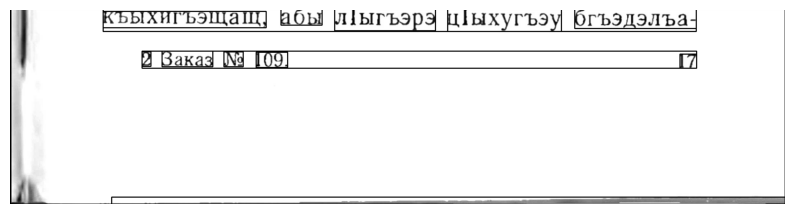

In [24]:
import matplotlib.pyplot as plt

data = pytesseract.image_to_data(
    gray_bottom_area,
    lang='kbd',
    output_type=pytesseract.Output.DICT
)

def process_text(data):
    # Переменная для отслеживания текущей строки
    current_line = 0

    # Перебор блоков текста с использованием enumerate
    for i, text in enumerate(data['text']):
        text = text.strip()
        if text:
            # Проверка, является ли блок текста новой строкой
            if current_line != data['line_num'][i]:
                print('\n')  # Печать новой строки
                current_line = data['line_num'][i]

            print(text, end=' ')

def draw_rectangles(image, data):
    # Перебор блоков текста
    for i in range(len(data['text'])):
        # Рисование границы вокруг распознанного блока текста
        x = data['left'][i]
        y = data['top'][i]
        w = data['width'][i]
        h = data['height'][i]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Обработка текста и определение новых строк
process_text(data)

# Отрисовка границ распознанных объектов
draw_rectangles(gray_bottom_area, data)

# Отображение изображения с границами распознанных объектов
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(gray_bottom_area, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()